In [1]:
# Numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

# Machine learning
import tensorflow as tf
import keras
import sklearn
import sklearn.preprocessing, sklearn.base, sklearn.utils, sklearn.linear_model, sklearn.svm

# Various Python tricks and libraries
import requests
import time
import functools
import operator
import collections

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def cheb(x, max_order): # x is (x.len). chebs is (x.len, max_order)
    chebs = [np.ones_like(x), x]
    for i in range(max_order - 2):
        chebs.append(2 * chebs[1] * chebs[-1] - chebs[-2])
    return np.stack(chebs, axis=-1)

In [3]:
# Get the data
x = np.mgrid[-10:10:0.05].reshape(1, -1).T
r = np.linalg.norm(x, axis=-1)
y = np.sin(np.pi * r) * (1 / r**2 - 2 / r)

df = pd.DataFrame(x, columns=['x'])
df['y'] = y

# Drop NA
df = df.dropna(axis=0)

# Standard Scaling
df[:] = sklearn.preprocessing.MinMaxScaler(feature_range=(-1,1)).fit_transform(df[:])

# Outlier removal
df = df[(np.abs(scipy.stats.zscore(df))<1).all(axis=1)]

# Scale again to tidy up
df[:] = sklearn.preprocessing.MinMaxScaler(feature_range=(-1,1)).fit_transform(df.copy())

In [4]:
X = df.x
Y = df.y
Z = cheb(df.x, 50)

In [5]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(Z, Y)
YHAT = lr.predict(Z)

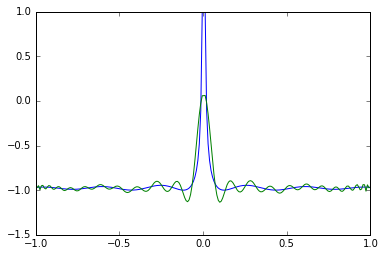

In [6]:
plt.plot(X, Y, X, YHAT)

### Maybe SVM fairs better?

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/xzhang1/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


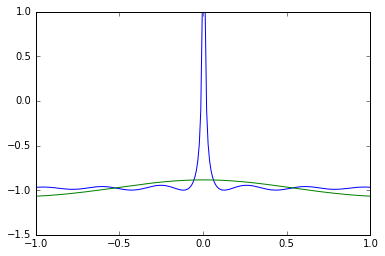

In [7]:
svm = sklearn.svm.SVR(kernel='rbf',degree=15)
svm.fit(X.reshape(-1,1), Y.reshape(-1,1))
plt.plot(X, Y, X, svm.predict(X.reshape(-1,1)).reshape(-1))

In [14]:
np.savetxt("1d_sinRoverR.txt", np.stack((X, Y), axis=-1), delimiter=",")